In [1]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [4]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


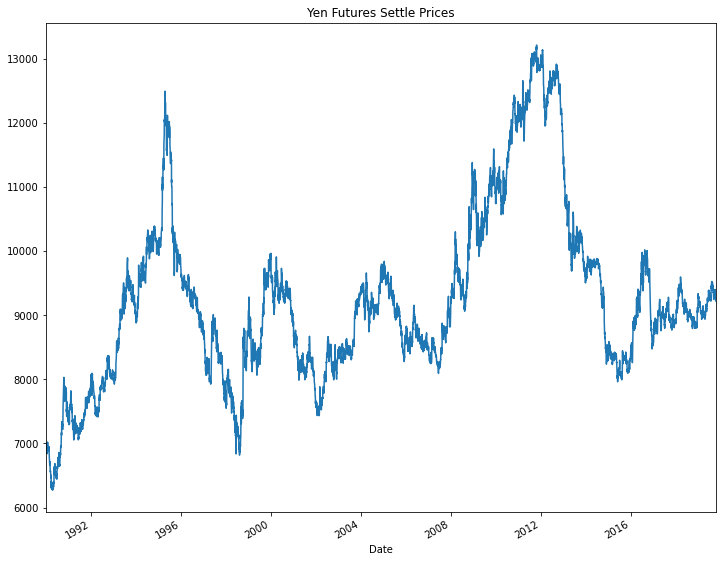

In [5]:
# Plot just the "Settle" column from the dataframe:
# Plotting with margins set to 0 to fit screenshot
yen_futures.Settle.plot(figsize = (12,10), title = 'Yen Futures Settle Prices')
plt.margins(x = 0)

In [6]:
import statsmodels.api as sm

In [7]:
# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate seri
settle_noise, settle_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])

In [8]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
df_settle_price = pd.DataFrame(yen_futures['Settle'])
df_settle_price['Noise'] = settle_noise
df_settle_price['Trend'] = settle_trend
df_settle_price.head()

,Settle,Noise,Trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062


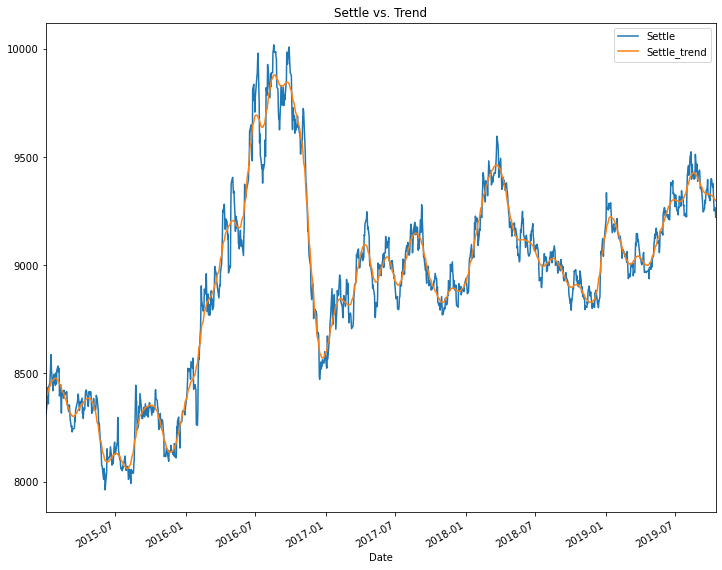

In [9]:
# Plot the Settle Price vs. the Trend for 2015 to the present
settle_price_2015_to_present = yen_futures.loc['2015-01-01':]
trend_2015_to_present = settle_trend.loc['2015-01-01':]

# combining plots
settle_vs_trend = pd.concat([settle_price_2015_to_present, trend_2015_to_present], axis = "columns", join = "inner")

# labeling each line 
settle_vs_trend_slice = settle_vs_trend[['Settle', 'Settle_trend']]

# Plotting with margins set to 0 to fit screenshot
settle_vs_trend_slice.plot(figsize = (12,10), title = 'Settle vs. Trend')
plt.margins(x = 0)

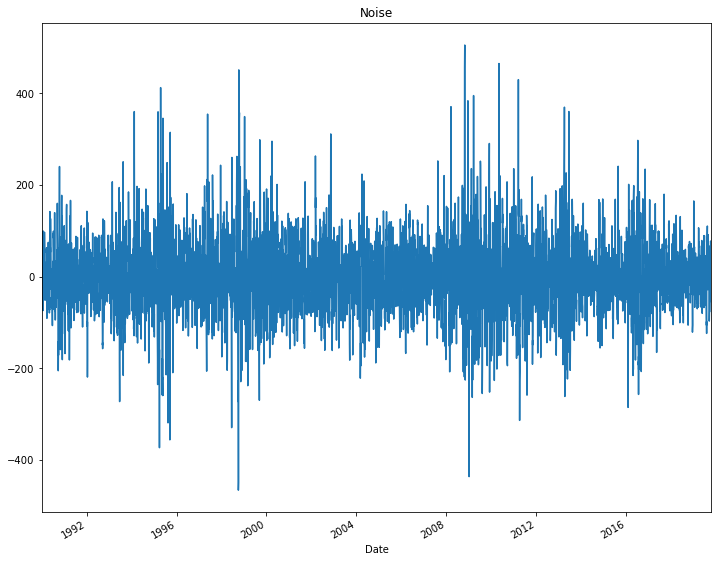

In [10]:
# Plot the Settle Noise
settle_noise.plot(figsize = (12,10), title = 'Noise')
plt.margins(x = 0)

In [11]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [12]:
# Importing ARMA
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

In [13]:
# Estimate and ARMA model using statsmodels (use order=(2, 1))
arma_model = ARMA(returns.Settle, order = (2,1))

# Fit the model and assign it to a variable called results
arma_results = arma_model.fit()

C:\Users\yaone\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\yaone\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no as

In [14]:
# Output model summary results:
arma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Settle   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Thu, 25 Mar 2021   AIC                          15798.142
Time:                        13:42:36   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0063      0.008      0.804      0.421      -0.009       0.022
ar.L1.Settle    -0.3064      1.277     -0.240      0.810      -2.810       2.197
ar.L2.Settle    -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.Settle     0.2949      1.277      0.231      0.817      -2.208       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3326           +0.0000j            3.3326            0.5000
AR.2         -157.0960           +0.0000j          157.0960            0.5000
MA.1           -3.3914           +0.0000j            3.3914            0.5000
-----------------------------------------------------------------------------
"""

In [15]:
print("In the above ARMA model, the autoregressive term has a p-value (.42) that is greater than the significance level of 0.05. Therefore, the coefficient for the autoregressive term is not statistically significant.")
print("The model should not be included as it is not stationary")

In the above ARMA model, the autoregressive term has a p-value (.42) that is greater than the significance level of 0.05. Therefore, the coefficient for the autoregressive term is not statistically significant.
The model should not be included as it is not stationary


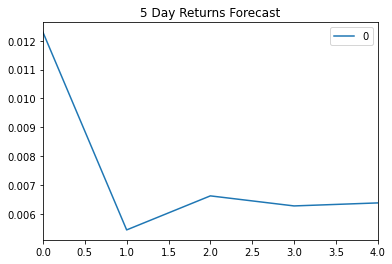

In [16]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(arma_results.forecast(steps = 5)[0]).plot(title = "5 Day Returns Forecast")
plt.margins(x = 0)

In [17]:
# Importing Arima
from statsmodels.tsa.arima_model import ARIMA

settle = (yen_futures[["Settle"]])
settle = settle.replace(-np.inf, np.nan).dropna()
settle.tail()

,Settle
Date,
2019-10-09,9338.0
2019-10-10,9303.5
2019-10-11,9251.0
2019-10-14,9265.0
2019-10-15,9221.5


In [18]:
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
arima_model = ARIMA(settle.Settle, order = (5,1,1))

# Fit the model
arima_results = arima_model.fit()

C:\Users\yaone\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\yaone\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no as

In [19]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Thu, 25 Mar 2021   AIC                          83905.238
Time:                        13:43:59   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3161      0.700      0.452      0.652      -1.056       1.688
ar.L1.D.Settle     0.2822      0.699      0.404      0.687      -1.088       1.653
ar.L2.D.Settle     0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0012      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2972      0.699     -0.425      0.671      -1.668       1.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8918           -1.3787j            2.3409           -0.1002
AR.2            1.8918           +1.3787j            2.3409            0.1002
AR.3           -2.2705           -3.0203j            3.7785           -0.3526
AR.4           -2.2705           +3.0203j            3.7785            0.3526
AR.5          -11.0834           -0.0000j           11.0834           -0.5000
MA.1            3.3643           +0.0000j            3.3643            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
print("In the above ARMA model, the autoregressive term has a p-value (.65) that is greater than the significance level of 0.05. Therefore, the coefficient for the autoregressive term is not statistically significant.")
print("The model should not be included as it is not stationary")

In the above ARMA model, the autoregressive term has a p-value (.65) that is greater than the significance level of 0.05. Therefore, the coefficient for the autoregressive term is not statistically significant.
The model should not be included as it is not stationary


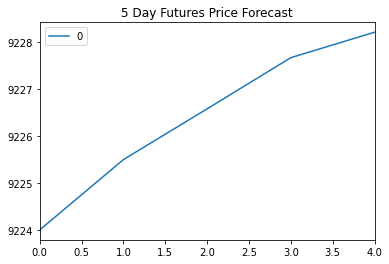

In [21]:
pd.DataFrame(arima_results.forecast(steps = 5)[0]).plot(title = "5 Day Futures Price Forecast")
plt.margins(x = 0) 

In [22]:
import arch as arch
from arch import arch_model

In [23]:
# Estimate a GARCH model:
garch_model = arch_model(returns.Settle, mean = "Zero", vol = "GARCH", p=2, q=1)

# Fit the model
garch_results = garch_model.fit(disp = "off")

In [24]:
# Summarize the model results
garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Thu, Mar 25 2021   Df Residuals:                     7514
Time:                        13:49:22   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [25]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [26]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = garch_results.forecast(start = last_day, horizon = forecast_horizon)
forecasts

C:\Users\yaone\anaconda3\envs\dev\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [27]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [28]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


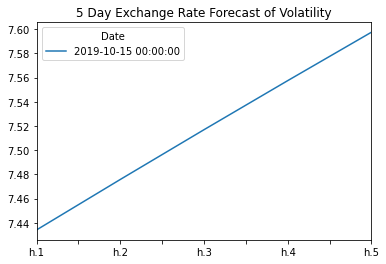

In [29]:
# Plot the final forecast
final.plot(title = "5 Day Exchange Rate Forecast of Volatility")
plt.margins(x = 0)